In [7]:
import findspark
findspark.init()
# from pyspark import SparkConf 
# from pyspark.context import SparkContext
import pyspark
import random

In [12]:
import random

sc.stop() 
sc = pyspark.SparkContext("local",appName = "Pi")
num_samples = 1000000

def inside(p):
    x, y = random.random(), random.random()
    return x*x + y*y <1

count = sc.parallelize(range(0, num_samples)).filter(inside).count()

pi = 4*count/num_samples
print(pi)

sc.stop()

3.140976


# Converting to Lowercase and Splitting: (Lower and Split)

In [ ]:
def lower_split(lines):
    lines = lines.lower()
    lines = lines.split()
    return lines 

In [3]:
rdd1 = rdd.map(lower_split)
rdd1 = rdd1.flatMap(lambda list: list)
rdd1 = rdd1.filter(lambda x: x.replace('/',''))
rdd1.take(20)

NameError: name 'lower_split' is not defined

In [5]:
# Removing StopWords:(Filter)

In [6]:
stop_words = ['a','all','the','as','is','am','an','and','be','been','from','had','I',"I'd",'why','with']
rdd2 = rdd1.filter(lambda x:x not in stop_words)
rdd2.take(20)

['hi',
 'prof.',
 'stein,/',
 'ivailo',
 'dimov',
 'how',
 'are',
 'you?',
 'this',
 'shawn',
 'ni,',
 'i',
 'rutgers',
 'graduate',
 'student.',
 'it',
 'was',
 'pleasure',
 'to',
 'meet']

# Sum of Numbers from 1 to 500:

In [7]:
sum_rdd = sc.parallelize(range(1,500))
sum_rdd.reduce(lambda x,y: x+y)

124750

In [8]:
df = spark.read.option('header','true')\
                .option('inferSchema','true')\
                .csv('Kobe.csv')
df.cache()

DataFrame[Season: string, Age: int, Tm: string, Lg: string, Pos: string, G: int, GS: int, MP: double, FG: double, FGA: double, FG%: double, 3P: double, 3PA: double, 3P%: double, 2P: double, 2PA: double, 2P%: double, eFG%: double, FT: double, FTA: double, FT%: double, ORB: double, DRB: double, TRB: double, AST: double, STL: double, BLK: double, TOV: double, PF: double, PTS: double]

In [9]:
print(df.columns)

['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


In [10]:
df.orderBy('PTS',ascending = False).limit(10).toPandas()

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2005-06,27,LAL,NBA,SG,80,80,41.0,12.2,27.2,...,0.850,0.9,4.4,5.3,4.5,1.8,0.4,3.1,2.9,35.4
1,2006-07,28,LAL,NBA,SG,77,77,40.8,10.6,22.8,...,0.868,1.0,4.7,5.7,5.4,1.4,0.5,3.3,2.7,31.6
2,2002-03,24,LAL,NBA,SG,82,82,41.5,10.6,23.5,...,0.843,1.3,5.6,6.9,5.9,2.2,0.8,3.5,2.7,30.0
3,2000-01,22,LAL,NBA,SG,68,68,40.9,10.3,22.2,...,0.853,1.5,4.3,5.9,5.0,1.7,0.6,3.2,3.3,28.5
4,2007-08,29,LAL,NBA,SG,82,82,38.9,9.5,20.6,...,0.840,1.1,5.2,6.3,5.4,1.8,0.5,3.1,2.8,28.3
5,2011-12,33,LAL,NBA,SG,58,58,38.5,9.9,23.0,...,0.845,1.1,4.3,5.4,4.6,1.2,0.3,3.5,1.8,27.9
6,2004-05,26,LAL,NBA,SG,66,66,40.7,8.7,20.1,...,0.816,1.4,4.5,5.9,6.0,1.3,0.8,4.1,2.6,27.6
7,2012-13,34,LAL,NBA,SG,78,78,38.6,9.5,20.4,...,0.839,0.8,4.7,5.6,6.0,1.4,0.3,3.7,2.2,27.3
8,2009-10,31,LAL,NBA,SG,73,73,38.8,9.8,21.5,...,0.811,1.1,4.3,5.4,5.0,1.5,0.3,3.2,2.6,27.0
9,2008-09,30,LAL,NBA,SG,82,82,36.1,9.8,20.9,...,0.856,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3,26.8


In [11]:
# 3 point attempts 
from pyspark.sql.functions import col
fga_py = df.groupBy('Season')\
            .agg({'MP':'sum','3PA':'sum'})\
            .select(col('Season'),(36*col('sum(3PA)')/col('sum(MP)'))).alias('fg3a')\
            .orderBy('Season')

In [12]:
fga_py.toPandas()

,Season,((sum(3PA) * 36) / sum(MP))
0,1996-97,4.412903
1,1997-98,3.876923
2,1998-99,1.899736
3,1999-00,2.073298
4,2000-01,2.552567
5,2001-02,1.597911
6,2002-03,3.469880
7,2003-04,3.159574
8,2004-05,5.218673
9,2005-06,5.707317


In [13]:
# Alternatively, we can utilize Spark SQL to perform the same query using SQL syntax

In [14]:
sqlContext.registerDataFrameAsTable(df,'df')
fga_py = sqlContext.sql('''Select Season, sum(3PA)/sum(MP)*36 3pa_p36m
                            FROM df GROUP BY Season
                            Order by Season''')

In [15]:
fga_py.toPandas().head()

,Season,3pa_p36m
0,1996-97,4.412903
1,1997-98,3.876923
2,1998-99,1.899736
3,1999-00,2.073298
4,2000-01,2.552567


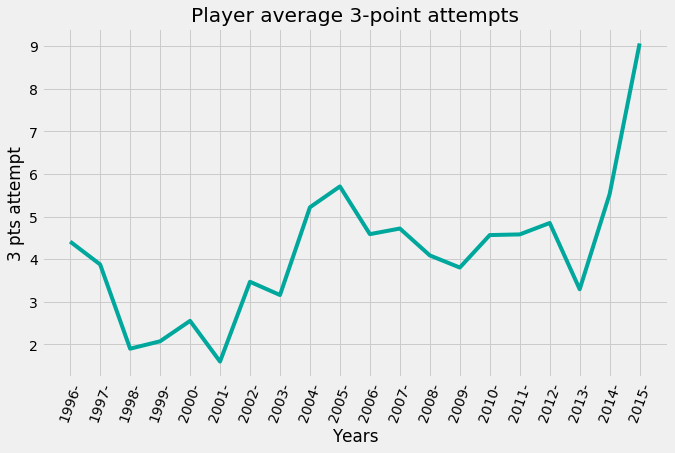

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

_df = fga_py.toPandas()
_df.Season = _df.Season.apply(lambda x:x[0:5])
plt.figure(figsize=(10,6))
plt.plot(_df.Season,_df['3pa_p36m'], color = '#00a79c')
plt.xticks(rotation=70)
plt.xlabel('Years')
plt.ylabel('3 pts attempt')
_=plt.title('Player average 3-point attempts')
plt.show()

In [17]:
from pyspark.ml.feature import VectorAssembler
fga_py = fga_py.withColumn("Season",fga_py["Season"].substr(0,4).cast("int"))
t = VectorAssembler(inputCols = ['Season'], outputCol = 'features')
training = t.transform(fga_py)\
            .withColumn('Season',fga_py.Season)\
            .withColumn('label',fga_py['3pa_p36m'])
training.toPandas().head()


,Season,3pa_p36m,features,label
0,1996,4.412903,[1996.0],4.412903
1,1997,3.876923,[1997.0],3.876923
2,1998,1.899736,[1998.0],1.899736
3,1999,2.073298,[1999.0],2.073298
4,2000,2.552567,[2000.0],2.552567


In [26]:
from pyspark.sql.types import Row
from pyspark.ml.regression import RandomForestRegressor


training_yrs = training.select('Season').rdd.map(lambda x:x[0]).collect()
training_y = training.select('3pa_p36m').rdd.map(lambda x:x[0]).collect()
prediction_yrs = [2017,2018,2019,2020,2021]
all_yrs = training_yrs + prediction_yrs

# built testing DataFrame
test_rdd = sc.parallelize(all_yrs)
row = Row('Season')
all_years_features = t.transform(test_rdd.map(row).toDF())

# apply linear regression model
lr = LinearRegression(maxIter = 10)
model = lr.fit(training)
df_results = model.transform(all_years_features).toPandas()

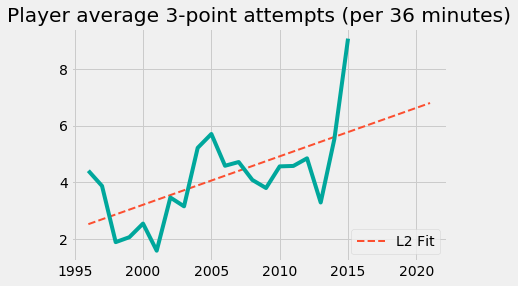

In [27]:
# Plot the linear model fitting with the raw dataset
plt.plot(df_results.Season,df_results.prediction,linewidth = 2, linestyle = '--',color = '#fc4f30',label = 'L2 Fit')
plt.plot(training_yrs,training_y,color = '#00a79c',label = None)
plt.legend(loc = 4)
_= plt.title('Player average 3-point attempts (per 36 minutes)')
plt.show()

In [50]:
data = training.toPandas()[['Season','3pa_p36m']]

In [51]:
data.head()

,Season,3pa_p36m
0,1996,4.412903
1,1997,3.876923
2,1998,1.899736
3,1999,2.073298
4,2000,2.552567


/Users/shawn/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.710814058820669e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)


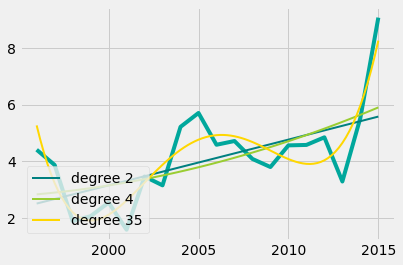

In [143]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np


test1 = data.reindex(np.arange(0,19.2,0.2)).reset_index(drop=True)
test1.Season = test1.Season.interpolate()
test1['3pa_p36m'] = test1['3pa_p36m'].interpolate()
test1

# x = np.array(data.Season)
x = np.array(test1.Season)
X = x[:,np.newaxis]
colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(training_yrs,training_y,color = '#00a79c',label = None)
for count, degree in enumerate([2, 4, 35]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
#     model.fit(X, data['3pa_p36m'])
    model.fit(X, test1['3pa_p36m'])
    y_plot = model.predict(X)
#     plt.plot(data.Season, y_plot, color=colors[count], linewidth=lw,
#              label="degree %d" % degree)
    plt.plot(test1.Season, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

In [139]:
import scipy.s

ModuleNotFoundError: No module named 'scipy.s'

In [76]:
# import numpy as np
# x_plot = np.linspace(0, 10, 100)


# # generate points and keep a subset of them
# x = np.linspace(0, 10, 100)
# rng = np.random.RandomState(0)
# rng.shuffle(x)
# x = np.sort(x[:20])


# # create matrix versions of these arrays
# X = x[:, np.newaxis]
# X_plot = x_plot[:, np.newaxis]
X_test = np.array(list(data.Season))

In [132]:
import numpy

def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError, "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise ValueError, "Input vector needs to be bigger than window size."


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"


    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y


SyntaxError: invalid syntax (<ipython-input-132-78446bfe7b12>, line 36)

/Users/shawn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  


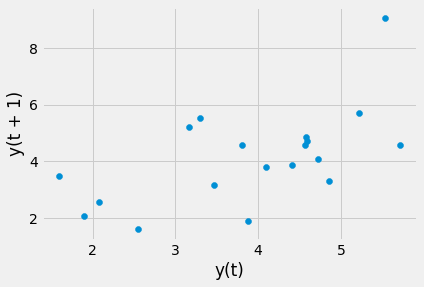

In [103]:
from pandas.tools.plotting import lag_plot
lag_plot(data['3pa_p36m'],lag=1)
plt.show()


In [81]:
X

array([[1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015]], dtype=int32)